# **Pertanyaan:**
### 1. Bagaimana distribusi mahasiswa yang graduate dan dropout?
### 2. Apa marital status yang memiliki peluang lebih banyak untuk lulus?
### 3. Apakah mahasiswa yang menggunakan beasiswa memiliki tingkat kelulusan yang lebih tinggi?
### 4. Apakah umur berpengaruh terhadap tingkat kelulusan mahasiswa?
### 5. Apakah GDP berpengaruh terhadap tingkat kelulusan mahasiswa?
### 6. Apakah ada relasi antara jumlah SKS dengan nilai yang didapatkan?
### 7. Bagaimana pengaruh jumlah SKS di semester 1 terhadap tingkat kelulusan mahasiswa?
### 8. Bagaimana pengaruh jumlah SKS di semester 2 terhadap tingkat kelulusan mahasiswa?
### 9. Bagaimana persebaran IP mahasiswa di semester 1?
### 10. Bagaimana pengaruh IP mahasiswa di semester 1 terhadap tingkat kelulusan mahasiswa?
### 11. Bagaimana persebaran IP mahasiswa di semester 2?
### 12. Bagaimana pengaruh IP mahasiswa di semester 2 terhadap tingkat kelulusan mahasiswa?

In [1]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Menampilkan data
df = pd.read_csv('data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
# Ukuran dataset
df.shape

(4424, 37)

In [4]:
# Menampilkan nama-nama kolom pada dataset ini
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [5]:
# Menampilkan jenis tipe data pada setiap kolom
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [6]:
df.drop(df[df['Target'] == 'Enrolled'].index, inplace = True)

In [7]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

## **Bagaimana distribusi mahasiswa yang graduate dan dropout?**

<function matplotlib.pyplot.show(close=None, block=None)>

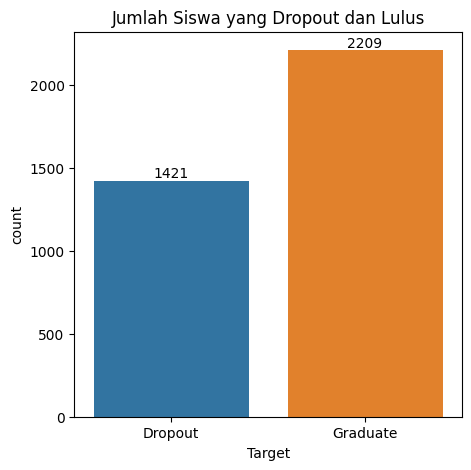

In [8]:
# Mengecek jumlah siswa yang dropout dan lulus 
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Target')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Jumlah Siswa yang Dropout dan Lulus')
plt.show

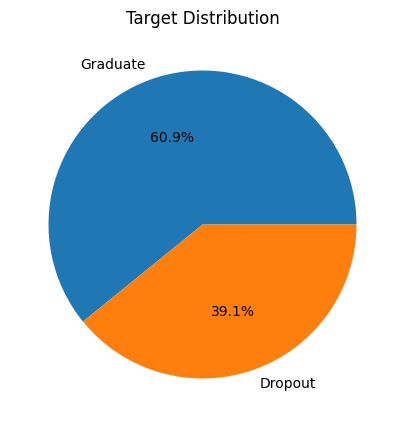

In [49]:
target_counts = df['Target'].value_counts()

plt.figure(figsize = (5,5))

plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')

plt.title('Target Distribution')

plt.show()

Tampak bahwa distribusinya masih cukup balance sehingga tidak perlu dilakukan penanganan khusus untuk mengatasi masalah imbalance data.

## **Apa marital status yang memiliki peluang lebih banyak untuk lulus?**

In [9]:
fig = px.histogram(df, x='Marital status', color='Target', title="<b> Marital Status and Target", barmode='group', labels={'Marital status':'Marital Status', 'count':'Count', 'Target':''}, template='plotly_dark', text_auto=True)

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))

fig.show()

Tampak bahwa ada perbedaan signifikan antara tingkat kelulusan mahasiswa yang belum menikah dibanding yang sudah menikah.

Jumlah mahasiswa single yang lulus sebesar hampir 2 kali lipat lebih banyak dibandingkan mahasiswa single yang dropout.

Sebaliknya jumlah mahasiswa sudah menikah justru lebih banyak yang dropout dibandingkan yang berhasil lulus

## **Apakah mahasiswa yang menggunakan beasiswa memiliki tingkat kelulusan yang lebih tinggi?**

In [10]:
fig = px.histogram(df, x='Scholarship holder', color='Target', title="<b> Scholarship Stakeholder and Target", barmode='group', labels={'Scholarship holder':'Scholarship Holder', 'count':'Count', 'Target':''}, template='plotly_dark', text_auto=True)

fig.update_layout(font=dict(size=17, family="Franklin Gothic"), width=700, height=500)

fig.show()

Tampak jelas bahwa lebih dari 85% mahasiswa yang menggunakan beasiswa berhasil lulus

Sebaliknya, mahasiswa yang tidak menggunakan beasiswa memiliki jumlah yang hampir sama antara yang lulus dan tidak lulus.

## **Apakah umur berpengaruh terhadap tingkat kelulusan mahasiswa?**

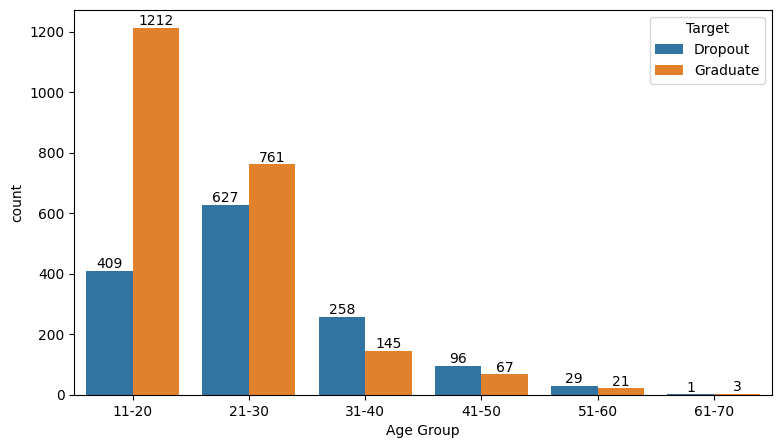

In [11]:
# Lakukan binning untuk age
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age at enrollment'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='Age Group', hue='Target')

# Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Ya, tampak bahwa umur berpengaruh terhadap tingkat kelulusan mahasiswa.

Terlihat bahwa semakin tua umur mahasiswa, maka semakin sedikit pula persentase mahasiswa yang lulus.

## **Apakah GDP berpengaruh terhadap tingkat kelulusan mahasiswa?**

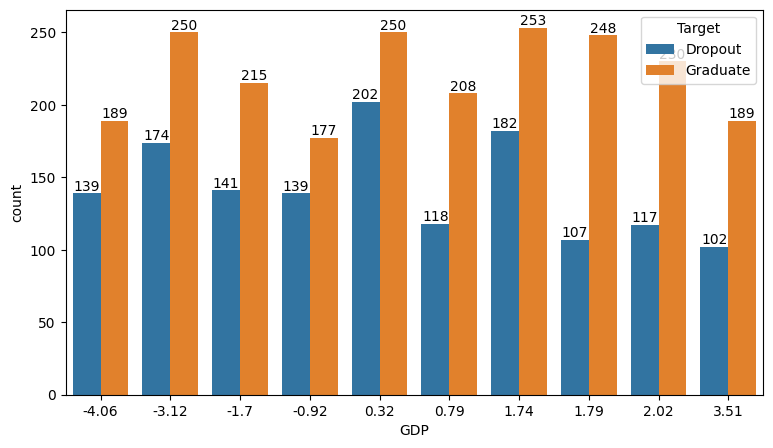

In [12]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='GDP', hue='Target')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Tampak bahwa GDP tidak terlalu berpengaruh terhadap tingkat kelulusan mahasiswa.

Hal tersebut karena jumlah mahasiswa yang lulus dan tidak lulus pada setiap GDP hampir sama.

Namun, bila dicermati secara lebih detail, tampak bahwa GDP 1.79, 2.02, 3.51 memiliki persentase mahasiswa yang lulus lebih tinggi dibandingkan GDP yang lain

## **Apakah ada relasi antara jumlah SKS dengan nilai yang didapatkan di semester 1?**

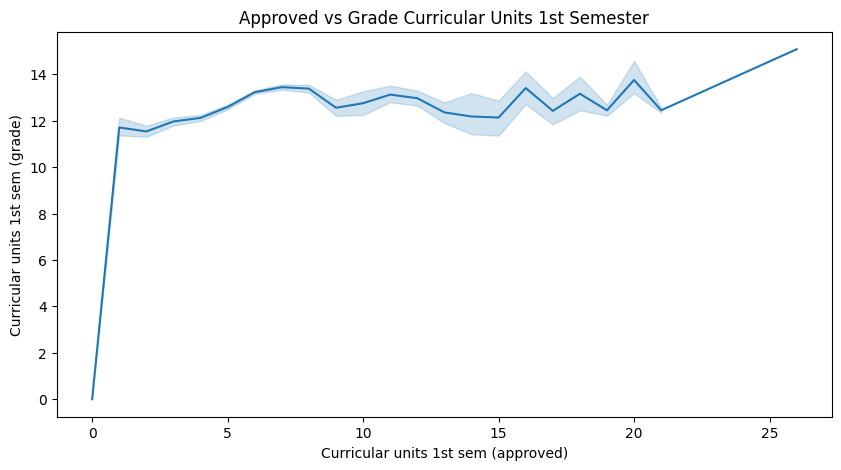

In [82]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df, x='Curricular units 1st sem (approved)', y='Curricular units 1st sem (grade)')

plt.title('Approved vs Grade Curricular Units 1st Semester')
plt.show()

Tampak ada perbedaan yang signifikan mengenai nilai yang didapatkan mahasiswa yang mengambil di bawah 5 sks dan di atas 5 sks.

Mahasiswa yang mengambil di bawah 5 sks mendapatkan nilai yang jauh lebih jelek dibandingkan mahasiswa yang mengambil di atas 5 sks.

Namun, tidak ada perbedaan signifikan mengenai nilai yang didapatkan mahasiswa yang mengambil antara 5-20 sks.

Mahasiswa yang mengambil di atas 21 sks mendapatkan nilai yang lebih baik dibandingkan mahasiswa yang mengambil di bawah 20 sks.

## **Apakah ada relasi antara jumlah SKS dengan nilai yang didapatkan di semester 2?**

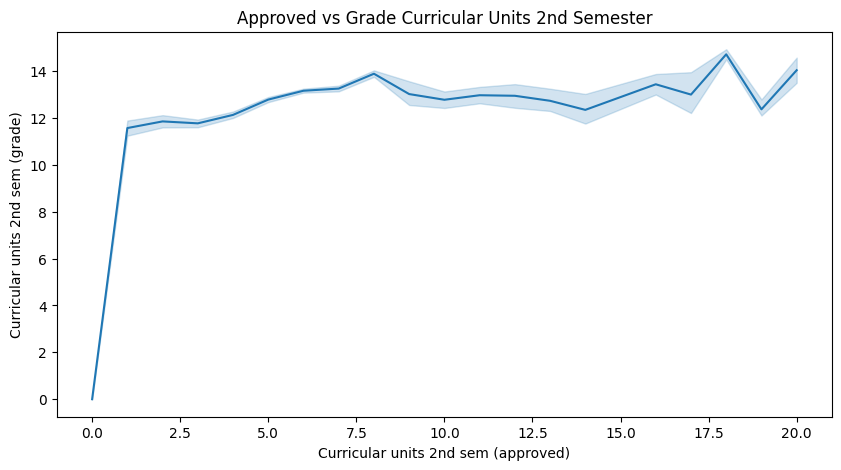

In [83]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df, x='Curricular units 2nd sem (approved)', y='Curricular units 2nd sem (grade)')

plt.title('Approved vs Grade Curricular Units 2nd Semester')
plt.show()

Tampak bahwa polanya masih sama seperti pada analisis semester 1 di atas.

## **Bagaimana pengaruh jumlah SKS di semester 1 terhadap tingkat kelulusan mahasiswa?**

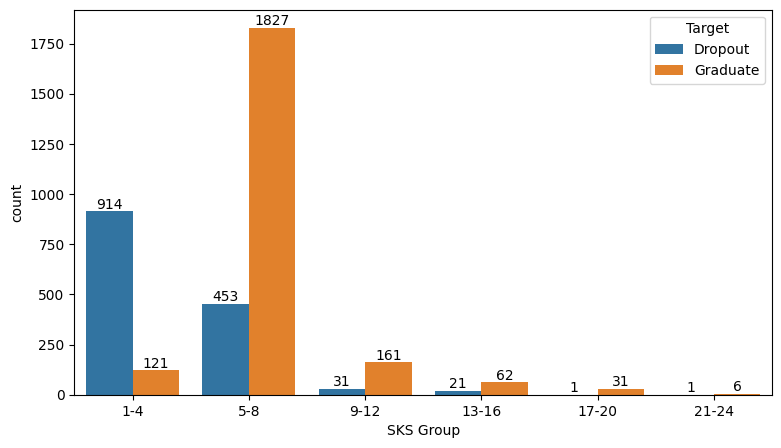

In [13]:
# Melakukan binning untuk jumlah SKS
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['1-4', '5-8', '9-12', '13-16', '17-20', '21-24']
df['SKS Group'] = pd.cut(df['Curricular units 1st sem (approved)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='SKS Group', hue='Target')

# Anotasi
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Tampak bahwa mahasiswa yang mengambil 1-4 SKS memiliki persentase kelulusan yang sangat kecil.

Sebaliknya, mahasiswa yang mengambil di atas 5 sks memiliki persentase kelulusan yang lebih besar.

## **Bagaimana pengaruh jumlah SKS di semester 2 terhadap tingkat kelulusan mahasiswa?**

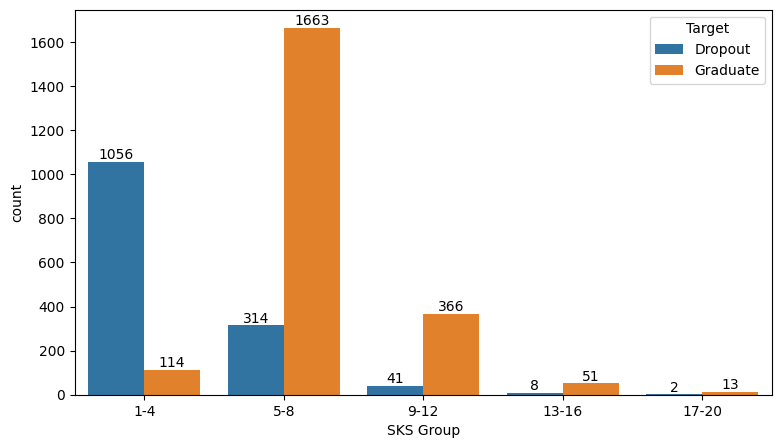

In [14]:
# Melakukan binning untuk jumlah SKS
bins = [0, 4, 8, 12, 16, 20]
labels = ['1-4', '5-8', '9-12', '13-16', '17-20']
df['SKS Group'] = pd.cut(df['Curricular units 2nd sem (approved)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='SKS Group', hue='Target')

# Anotasi
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Pola yang tampak masih sama seperti semester 1 di atas

Tampak bahwa mahasiswa yang mengambil 1-4 SKS memiliki persentase kelulusan yang sangat kecil.

Sebaliknya, mahasiswa yang mengambil di atas 5 sks memiliki persentase kelulusan yang lebih besar.

## **Bagaimana persebaran IP mahasiswa di semester 1?**

In [15]:
fig = px.histogram(df, x='Curricular units 1st sem (grade)', template='plotly_dark', marginal='rug', title="<b> 1st Semester Grade Distribution")
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

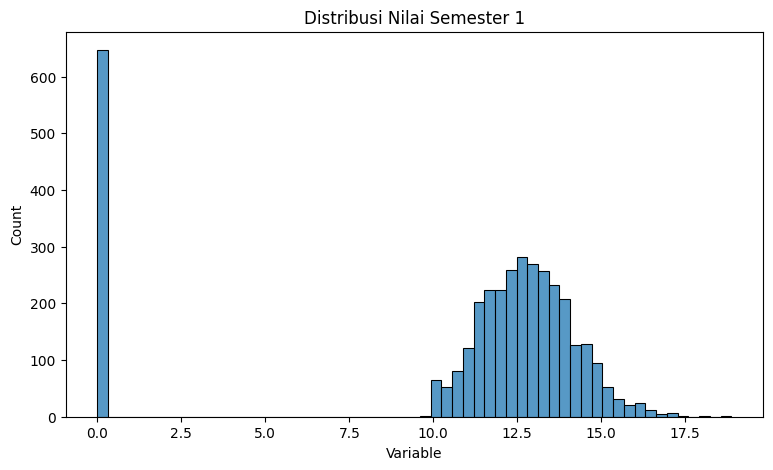

In [16]:
# Set the figure size
plt.figure(figsize=(9, 5))

# Plot the distribution using seaborn
sns.histplot(data=df, x='Curricular units 1st sem (grade)')

# Set plot title and labels
plt.title('Distribusi Nilai Semester 1')
plt.xlabel('Variable')
plt.ylabel('Count')

plt.show()

Tampak bahwa persebaran IP mahasiswa di semester 1 ada di antara 10 - 16

Ada sekitar 600 mahasiswa yang mendapatkan IP 0

Hal tersebut mungkin terjadi jika mahasiswa tidak pernah mengikuti kelas pada mata kuliah yang sudah ia daftarkan.

## **Bagaimana pengaruh IP mahasiswa di semester 1 terhadap tingkat kelulusan mahasiswa?**

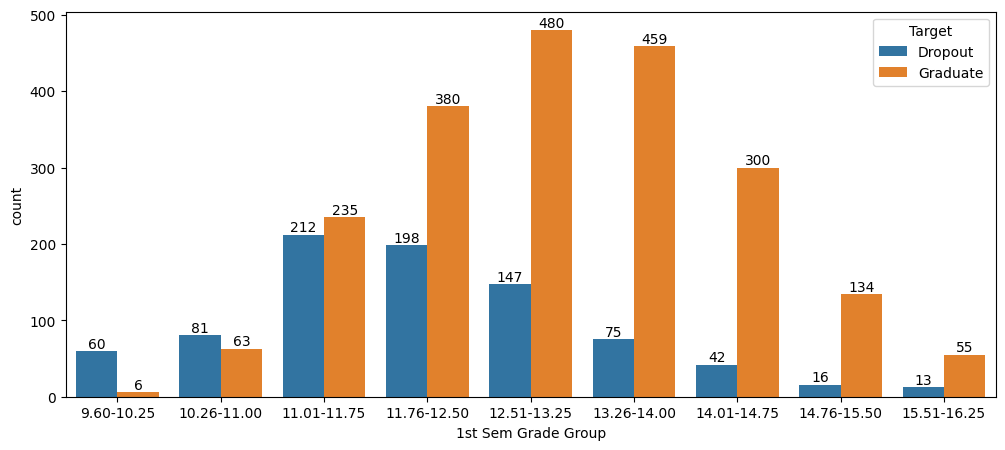

In [17]:
# Melakukan binning untuk nilai semester 1
bins = [9.5, 10.25, 11, 11.75, 12.5, 13.25, 14, 14.75, 15.5, 16.25]
labels = ['9.60-10.25', '10.26-11.00', '11.01-11.75', '11.76-12.50', '12.51-13.25', '13.26-14.00', '14.01-14.75', '14.76-15.50', '15.51-16.25']
df['1st Sem Grade Group'] = pd.cut(df['Curricular units 1st sem (grade)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x='1st Sem Grade Group', hue='Target')

# Anotasi
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Tampak jelas bahwa semakin tinggi IP, maka semakin besar pula persentase mahasiswa yang lulus.

Mahasiswa yang mendapatkan IP 9.6-10.25 memiliki persentase kelulusan yang sangat kecil.

Hal ini menunjukkan bahwa IP memang berpengaruh terhadap kelulusan mahasiswa.

## **Bagaimana persebaran IP mahasiswa di semester 2?**

In [18]:
fig = px.histogram(df, x='Curricular units 2nd sem (grade)', template='plotly_dark', marginal='rug', title="<b> 2nd Semester Grade Distribution")
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

Tampak bahwa persebaran IP mahasiswa di semester 2 ada di antara 10 - 17

Ada sekitar 800 mahasiswa yang mendapatkan IP 0

Distribusi ini masih mirip dengan distribusi IP pada semester 1.

## **Bagaimana pengaruh IP mahasiswa di semester 2 terhadap tingkat kelulusan mahasiswa?**

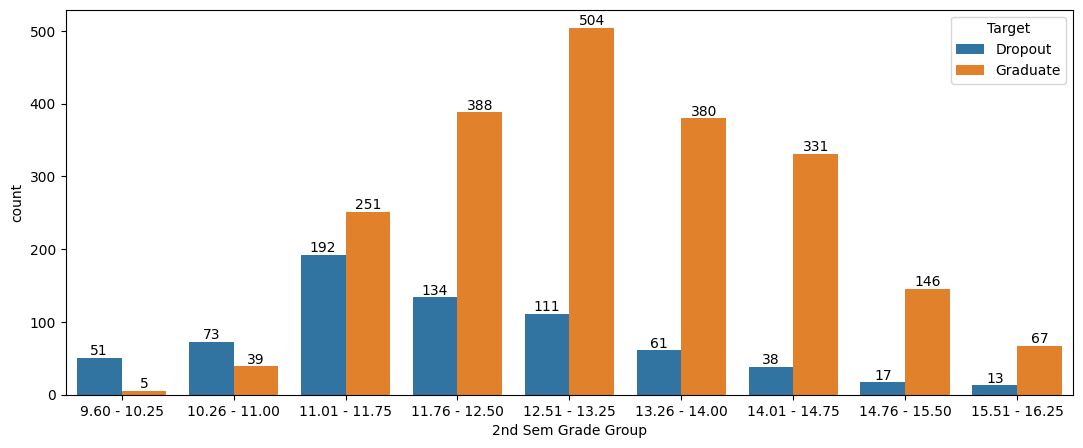

In [19]:
# Melakukan binning untuk nilai semester 2
bins = [9.5, 10.25, 11, 11.75, 12.5, 13.25, 14, 14.75, 15.5, 16.25]
labels = ['9.60 - 10.25', '10.26 - 11.00', '11.01 - 11.75', '11.76 - 12.50', '12.51 - 13.25', '13.26 - 14.00', '14.01 - 14.75', '14.76 - 15.50', '15.51 - 16.25']
df['2nd Sem Grade Group'] = pd.cut(df['Curricular units 2nd sem (grade)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(13, 5))
ax = sns.countplot(data=df, x='2nd Sem Grade Group', hue='Target')

# Anotasi
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Sama seperti semester 1, tampak jelas bahwa semakin tinggi IP, maka semakin besar pula persentase mahasiswa yang lulus.

## **Kesimpulan**
Karakteristik Mahasiswa yang Lulus:
1. Mahasiswa yang masih single
2. Penerima beasiswa
3. Memiliki umur di bawah 30 tahun
4. Mengambil lebih dari 5 sks
5. Memiliki IP di atas 12.50

## **Bonus EDA**

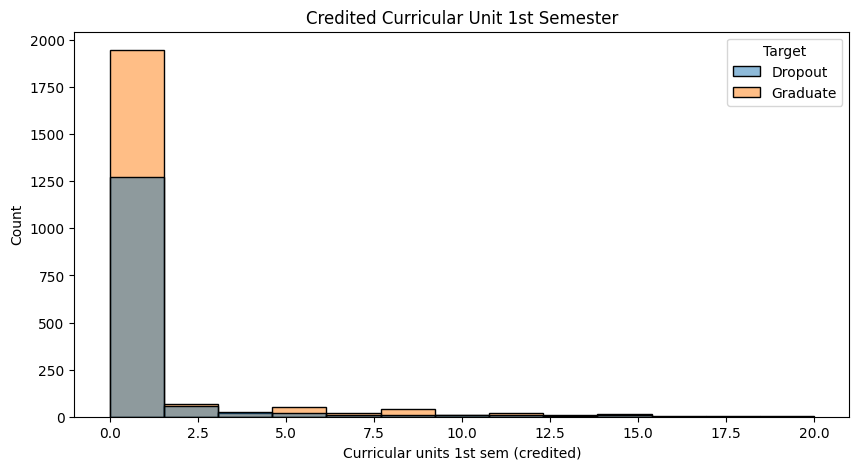

In [52]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 1st sem (credited)', hue='Target')

plt.title('Credited Curricular Unit 1st Semester')
plt.show()

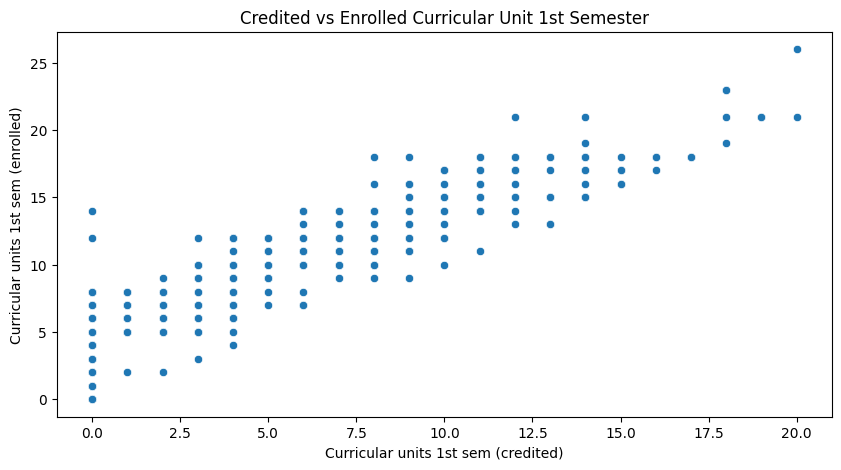

In [75]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df, x='Curricular units 1st sem (credited)', y='Curricular units 1st sem (enrolled)')

plt.title('Credited vs Enrolled Curricular Unit 1st Semester')
plt.show()

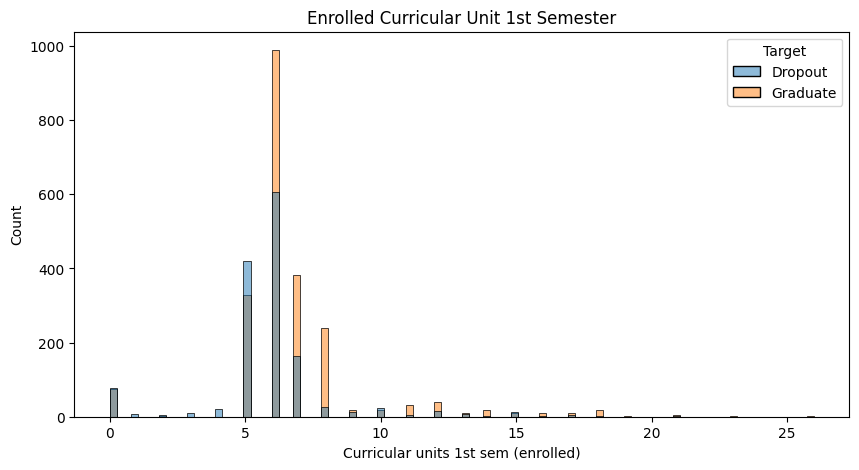

In [53]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 1st sem (enrolled)', hue='Target')

plt.title('Enrolled Curricular Unit 1st Semester')
plt.show()

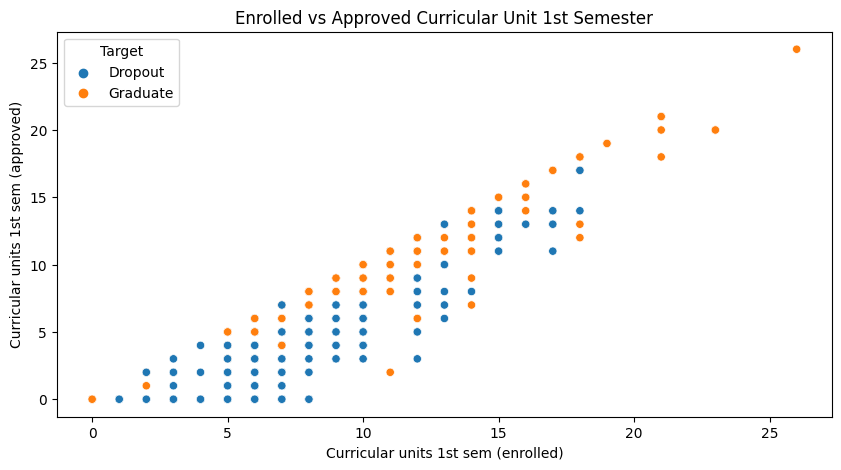

In [54]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df, x='Curricular units 1st sem (enrolled)', y='Curricular units 1st sem (approved)', hue='Target')

plt.title('Enrolled vs Approved Curricular Unit 1st Semester')
plt.show()

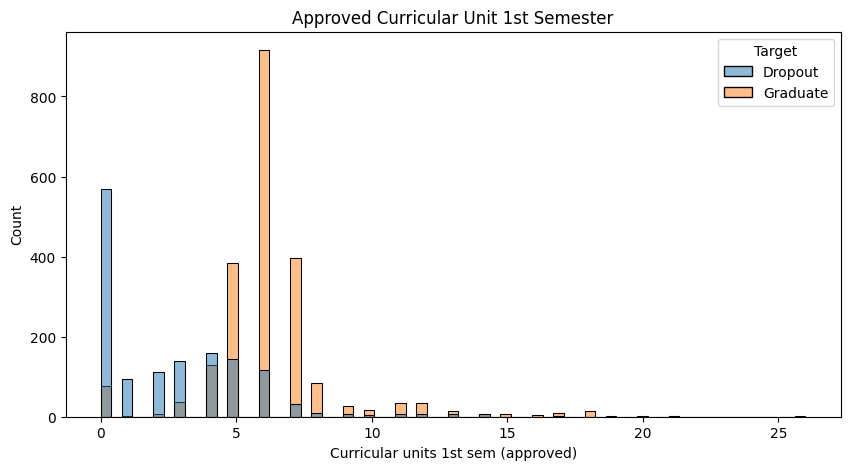

In [56]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 1st sem (approved)', hue='Target')

plt.title('Approved Curricular Unit 1st Semester')
plt.show()

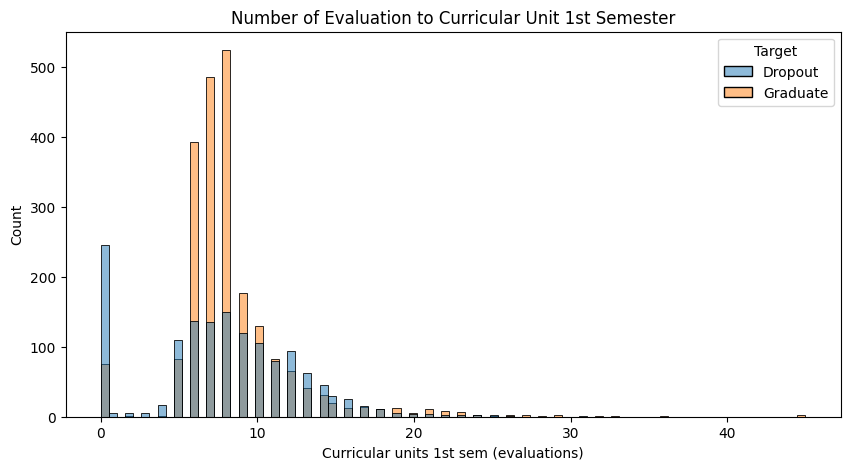

In [55]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 1st sem (evaluations)', hue='Target')

plt.title('Number of Evaluation to Curricular Unit 1st Semester')
plt.show()

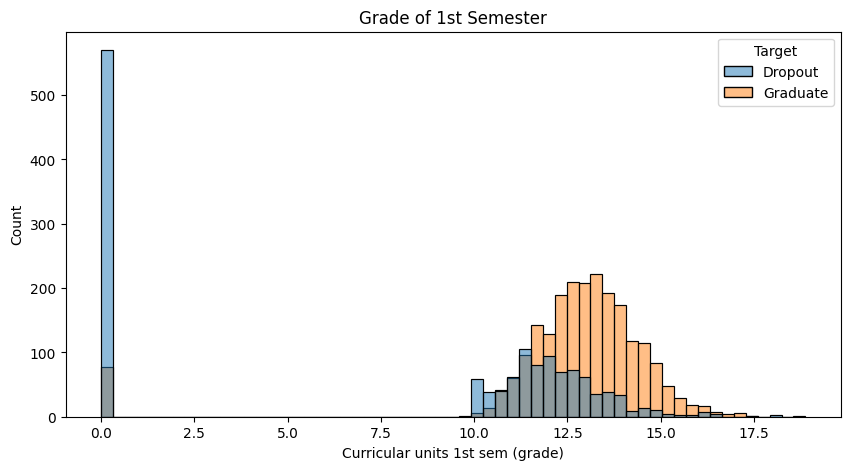

In [65]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 1st sem (grade)', hue='Target')

plt.title('Grade of 1st Semester')
plt.show()

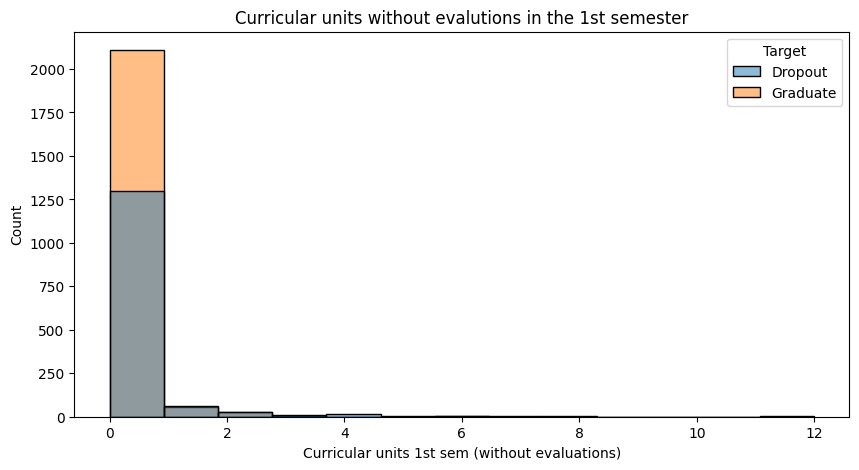

In [66]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 1st sem (without evaluations)', hue='Target')

plt.title('Curricular units without evalutions in the 1st semester')
plt.show()

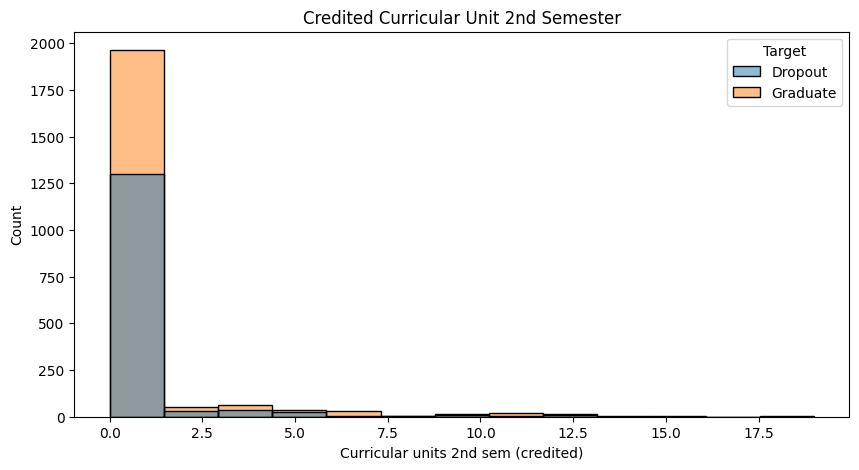

In [67]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 2nd sem (credited)', hue='Target')

plt.title('Credited Curricular Unit 2nd Semester')
plt.show()

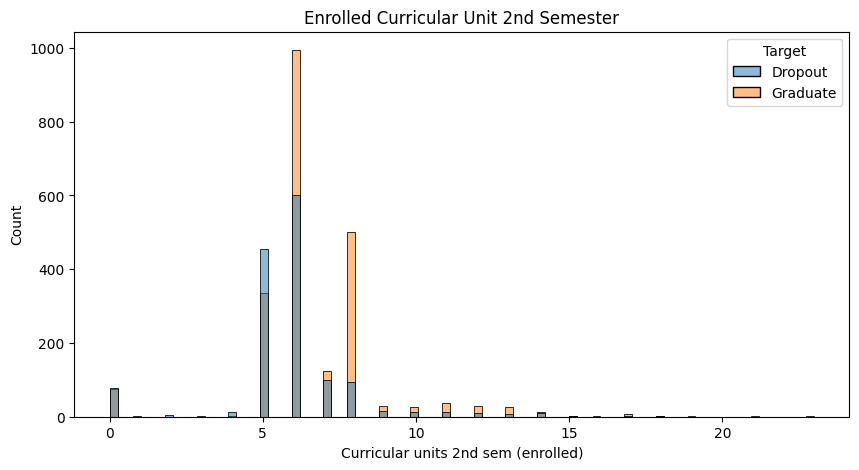

In [68]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 2nd sem (enrolled)', hue='Target')

plt.title('Enrolled Curricular Unit 2nd Semester')
plt.show()

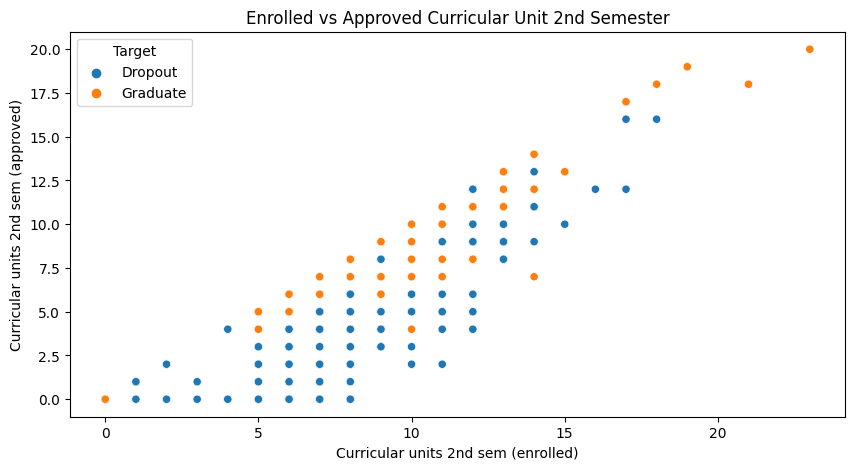

In [69]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df, x='Curricular units 2nd sem (enrolled)', y='Curricular units 2nd sem (approved)', hue='Target')

plt.title('Enrolled vs Approved Curricular Unit 2nd Semester')
plt.show()

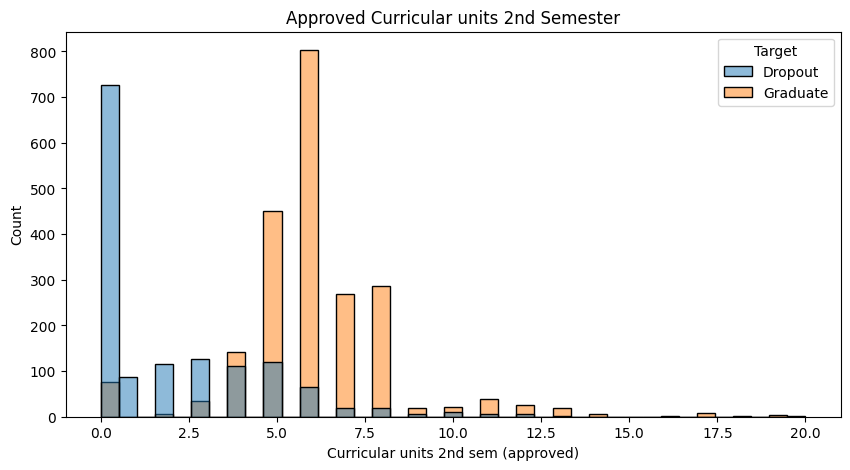

In [73]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 2nd sem (approved)', hue='Target')

plt.title('Approved Curricular units 2nd Semester')
plt.show()

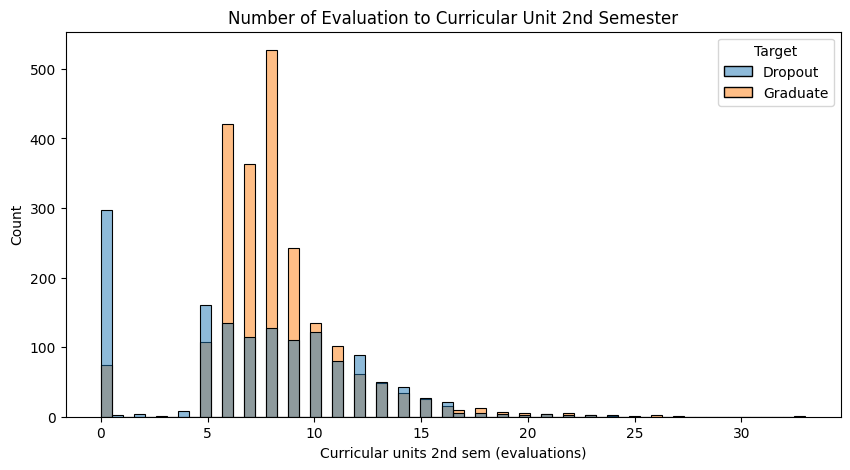

In [71]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 2nd sem (evaluations)', hue='Target')

plt.title('Number of Evaluation to Curricular Unit 2nd Semester')
plt.show()

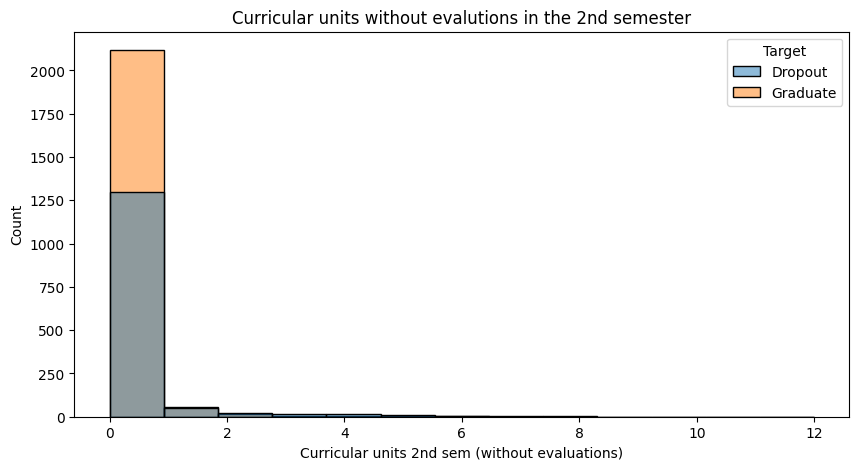

In [74]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 2nd sem (without evaluations)', hue='Target')

plt.title('Curricular units without evalutions in the 2nd semester')
plt.show()

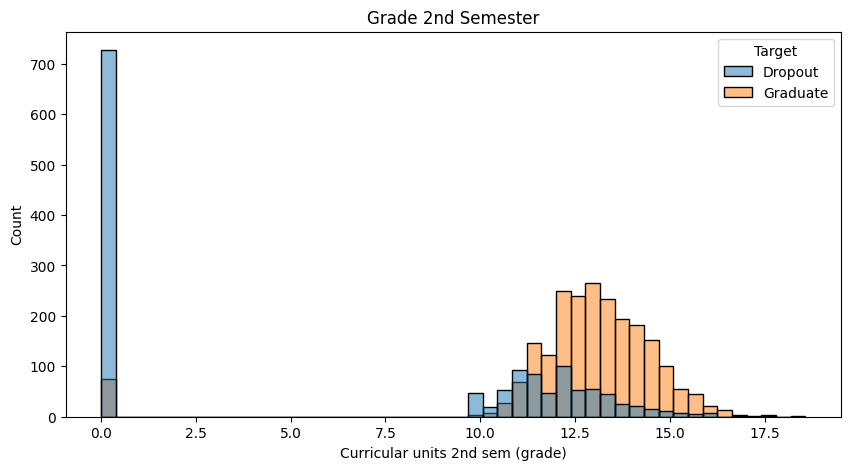

In [72]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Curricular units 2nd sem (grade)', hue='Target')

plt.title('Grade 2nd Semester')
plt.show()

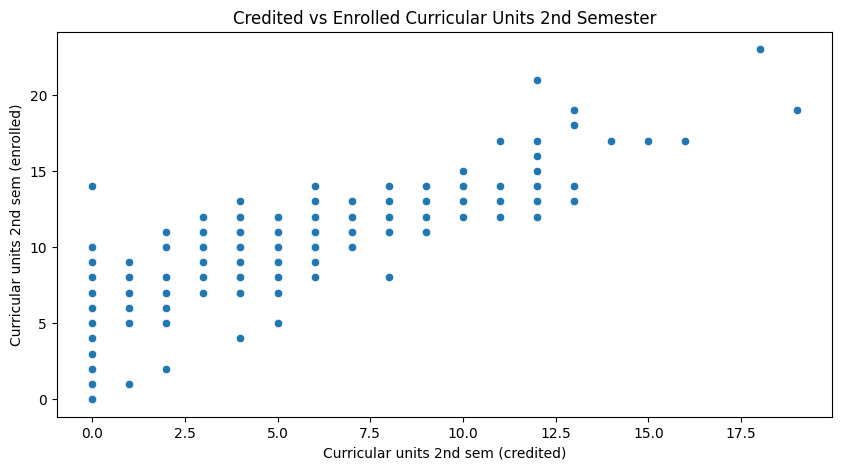

In [76]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df, x='Curricular units 2nd sem (credited)', y='Curricular units 2nd sem (enrolled)')

plt.title('Credited vs Enrolled Curricular Units 2nd Semester')
plt.show()